# Q1 a)

In [187]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 2
k2 = 2
k3 = 1
k4 = 1



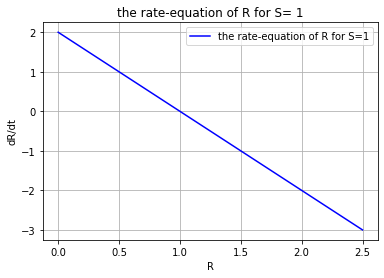

In [188]:
S = [1,2,5,10]

def plot_Rate(S,k1,k2,k3,k4):
    R_values = np.linspace(0, 2.5, 100)
    
    X = k3/k4*S
    drdt= k1*S-k2*X*R_values

    plt.plot(R_values, drdt, label=f'the rate-equation of R for S={S}', color='blue')

    # Plot the rate equation of R

    plt.xlabel('R')
    plt.ylabel('dR/dt')
    plt.title(f'the rate-equation of R for S= {S}')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_Rate(S[0],k1,k2,k3,k4)

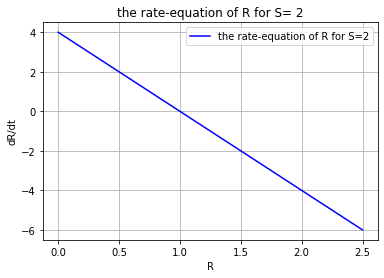

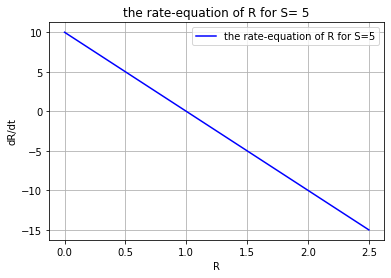

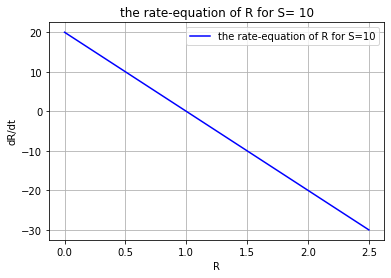

In [189]:
plot_Rate(S[1],k1,k2,k3,k4)
plot_Rate(S[2],k1,k2,k3,k4)
plot_Rate(S[3],k1,k2,k3,k4)

# b)

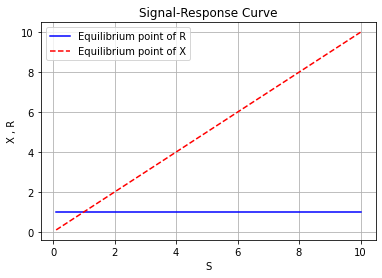

In [190]:

# Define the range of S values
S_values = np.linspace(0.1, 10, 100)

# Calculate the equilibrium points of the system


equilibrium_X = k3/k4*S_values

# Calculate the rate equation of R for each value of S
equilibrium_R = k1 * S_values/(k2*equilibrium_X)
# Plot the signal-response curve
plt.plot(S_values, equilibrium_R, label='Equilibrium point of R', color='blue')
plt.plot(S_values, equilibrium_X, label='Equilibrium point of X', linestyle='--', color='red')

plt.xlabel('S')
plt.ylabel('X , R')
plt.title('Signal-Response Curve')
plt.legend()
plt.grid(True)
plt.show()

All equilibrium points are stable for R, since dR/dt<0 when R>1 and dR/dt> 0 when R<1 or in other words the 
flow on both sides is directed towards it.
Suprisingly the stable point for X changes with S, however, stable point of R always remains the same R= 1. 

# c)
We use Euler's method to update the concentrations of R and X based on their rates of change defined in by the system of equations, alternatively scipy.integrate could be used for solving this system


Note: We assume that concentration was supposed to start from zero and increase for the first time after the period of 4

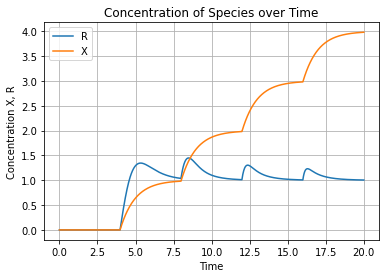

In [191]:

# Define the system of differential equations
def system(y, S):
    R, X = y
    dRdt = k1 * S - k2 * R * X
    dXdt = k3 * S - k4 * X
    return np.array([dRdt, dXdt])


# Define the time points
t = np.linspace(0, 20, 1000)
npoints=1000//20
dt = t[1] - t[0] 
# Define the initial conditions
y0 = [0, 0]

# Initialize the concentrations arrays
R_values = np.zeros_like(t)
X_values = np.zeros_like(t)


S=0
for i in range(1, len(t)):
    # Update S every 4 time units
    if i % (4 * len(t) // 20) == 0:
        S += 1
    tn=i*npoints
    tn1=(i+1)*npoints
    # Solve the system of differential equations
    derivatives = system(y0, S)
    # Update y0 using Euler's method
    y0 = y0 + derivatives * dt
    # Store the results
    R_values[i], X_values[i] = y0


# Plot the concentrations of all species over time
plt.plot(t, R_values, label='R')
plt.plot(t, X_values, label='X')
plt.xlabel('Time')
plt.ylabel('Concentration X, R')
plt.title('Concentration of Species over Time')
plt.legend()
plt.grid(True)
plt.show()


After eachh increase in S concetnration of X and R tries to reach the stable point X=S and R=1. This is in agreemennt with our results for the signal response curve where we could observe liniar dependance of X and S, and stability of eguilibrium R=1.

# Q2 a)

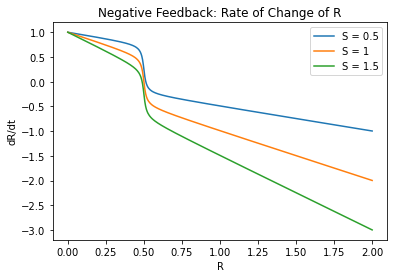

In [192]:
# Define the Goldbeter-Koshland function
def G(u, v, J, K):
    return (2*u*K) / (v - u + v*J + u*K + np.sqrt((v - u + v*J + u*K)**2 - 4*(v - u)*u*K))

# Negative Feedback Parameters
k0 = 1
k2 = 1
k3 = 0.5
k4 = 1
J3 = J4 = 0.01
S_values_neg = [0.5, 1, 1.5]

# Setup R range
R = np.linspace(0, 2, 400)

# Calculate dR/dt for each S in Negative Feedback
dRdt_neg = [k0 * G(k3, k4*r, J3, J4) - k2 * S * r for S in S_values_neg for r in R]

# Plotting
fig, ax = plt.subplots()
for idx, S in enumerate(S_values_neg):
    ax.plot(R, dRdt_neg[idx*len(R):(idx+1)*len(R)], label=f'S = {S}')

ax.set_xlabel('R')
ax.set_ylabel('dR/dt')
ax.set_title('Negative Feedback: Rate of Change of R')
ax.legend()
plt.show()

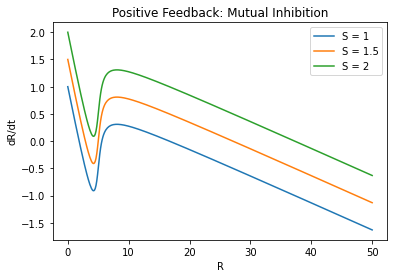

In [193]:
# Positive Feedback: Mutual Inhibition Parameters
k0_mi = 0
k1_mi = 1
k2_mi = 0.05
k02_mi = 0.5
k3_mi = 1
k4_mi = 0.2
J3_mi = J4_mi = 0.05
S_values_mi = [1, 1.5, 2]


R = np.linspace(0, 50, 400)
# Calculate dR/dt for each S in Positive Feedback: Mutual Inhibition
dRdt_mi = [k0_mi + k1_mi * S - k2_mi * r - k02_mi * G(k3_mi, k4_mi*r, J3_mi, J4_mi) * r for S in S_values_mi for r in R]

# Plotting
fig, ax = plt.subplots()
for idx, S in enumerate(S_values_mi):
    ax.plot(R, dRdt_mi[idx*len(R):(idx+1)*len(R)], label=f'S = {S}')

ax.set_xlabel('R')
ax.set_ylabel('dR/dt')
ax.set_title('Positive Feedback: Mutual Inhibition')
ax.legend()
plt.show()


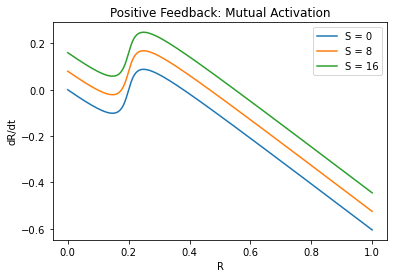

In [194]:
# Positive Feedback: Mutual Activation Parameters
k0_ma = 0.4
k1_ma = 0.01
k2_ma = k3_ma = 1
k4_ma = 0.2
J3_ma = J4_ma = 0.05
S_values_ma = [0, 8, 16]
R = np.linspace(0, 1, 400)
# Calculate dR/dt for each S in Positive Feedback: Mutual Activation
dRdt_ma = [k0_ma * G(k3_ma * r, k4_ma, J3_ma, J4_ma) + k1_ma * S - k2_ma * r for S in S_values_ma for r in R]

# Plotting
fig, ax = plt.subplots()
for idx, S in enumerate(S_values_ma):
    ax.plot(R, dRdt_ma[idx*len(R):(idx+1)*len(R)], label=f'S = {S}')

ax.set_xlabel('R')
ax.set_ylabel('dR/dt')
ax.set_title('Positive Feedback: Mutual Activation')
ax.legend()
plt.show()

# b)

### Negative feedback: Homeostasis 

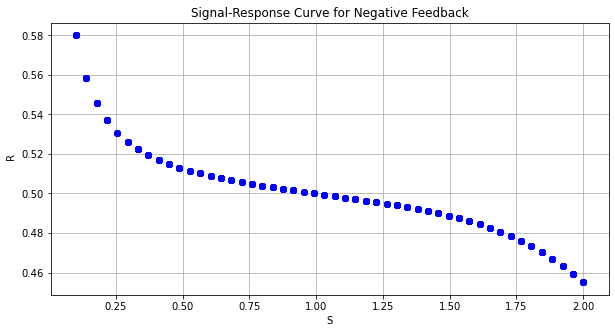

In [195]:
from scipy.optimize import fsolve

# Define the function for dR/dt for Negative Feedback for given S and R
def dRdt_neg(R, S):
    return k0 * G(k3, k4 * R, J3, J4) - k2 * S * R

S_range = np.linspace(0.1, 2, 50)



def find_steady_states(S_range, func, guess_R):
    steady_states = []
    for S in S_range:
        
        R_ss = [fsolve(func, r, args=(S))[0] for r in guess_R]
        # Filter and deduplicate solutions considering numerical errors
        
        R_ss = np.unique(R_ss)
        
        steady_states.append(R_ss)
    return steady_states

guess_R = np.linspace(0, 2, 10)
# Finding steady states for negative feedback
steady_states_neg = find_steady_states(S_range, dRdt_neg,guess_R)

# Plot steady states vs S
plt.figure(figsize=(10, 5))
for idx, R_ss in enumerate(steady_states_neg):
    S = S_range[idx]
    for r in R_ss:
        if  dRdt_neg(r, S):
            plt.plot(S, r, 'bo')
plt.xlabel('S')
plt.ylabel(' R')
plt.title('Signal-Response Curve for Negative Feedback')
plt.grid(True)
plt.show()

All equilibrium points are stable for R, since dR/dt<0 when R>1 and dR/dt> 0 when R<1 or in other words the 
flow on both sides is directed towards it.
The system's ability to maintain a stable state despite varying levels of S reflects the essential characteristic of homeostasis. The feedback mechanism adjusts the system back to a stable equilibrium, correcting deviations caused by changes in S.

Based on the plot above and plots from a) we can safely assume that there won't be  any bifurcation points

###  Positive feedback: Mutual inhibition

Note: Due to numerical errors of the solver it identifies fals equlibrium points. Thus we have to filter them by checking, if identified equilibrium is actualy within error acceptable bounds 

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


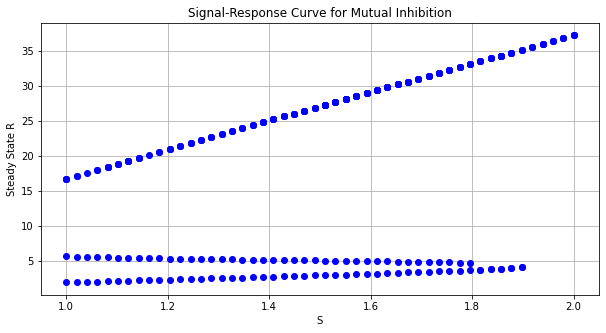

In [196]:
# Define the function for dR/dt for Positive Feedback: Mutual Inhibition for given S and R
def dRdt_mi(R, S):
    return k0_mi + k1_mi * S - k2_mi * R - k02_mi * G(k3_mi, k4_mi * R, J3_mi, J4_mi) * R

S_range = np.linspace(1, 2, 50)
# Finding steady states for positive feedback: mutual inhibition
guess_R = np.linspace(0, 50, 10)

steady_states_mi = find_steady_states(S_range, dRdt_mi, guess_R)

# Plot steady states vs S
plt.figure(figsize=(10, 5))
for idx, R_ss in enumerate(steady_states_mi):
    S = S_range[idx]
    for r in R_ss:
        #Due to numerical errors of the solver  it identifies fals equlibrium point so we have to filter them
        if dRdt_mi(r,S)<=0.00001 and dRdt_mi(r,S)>=-0.00001 :
            plt.plot(S, r, 'bo')
plt.xlabel('S')
plt.ylabel('Steady State R')
plt.title('Signal-Response Curve for Mutual Inhibition')
plt.grid(True)
plt.show()

In [197]:
R_ss

array([ 4.23278357,  4.23306897, 37.27139053, 37.27139053, 37.27139053])

In [198]:
dRdt_mi(4.23278357,2)

0.08736769935901711

Depending on the S value there might be several equilibrium points (either teo or three). Based on plots in a) we can conclude that equilibrium points would also vary in stability. After bifurcattion the first (bottom) and third point (top) should be stable and the second one (middle) should be unstable.

The bifurcation point should exist around S=1.9, and based on the plots provided in the write up it can be classified as a Saddle-Node bifurcation point.

###  Positive Feedback Mutual activation

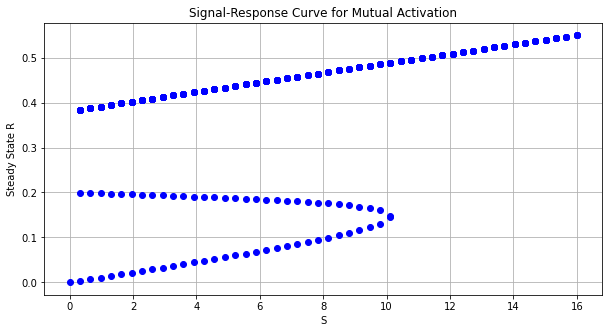

In [199]:

guess_R = np.linspace(0, 1.5, 10)
def dRdt_ma(R, S):
    return k0_ma * G(k3_ma * R, k4_ma, J3_ma, J4_ma) + k1_ma * S - k2_ma * R

# Range of S values to consider for stability analysis in Mutual Activation
S_range_ma = np.linspace(0, 16, 50)

# Finding steady states for positive feedback: mutual activation
steady_states_ma = find_steady_states(S_range_ma, dRdt_ma,guess_R)

# Plot steady states vs S
plt.figure(figsize=(10, 5))
for idx, R_ss in enumerate(steady_states_ma):
    S = S_range_ma[idx]
    for r in R_ss:
        if dRdt_ma(r,S)<=0.00001 and dRdt_mi(r,S)>=-0.00001 :
            plt.plot(S, r, 'bo')
plt.xlabel('S')
plt.ylabel('Steady State R')
plt.title('Signal-Response Curve for Mutual Activation')
plt.grid(True)
plt.show()


Similarly to Mutual inhibition the top and the bottom point are stable and the middle one is unstable.

The biffurcation point in this example exists around S=10, and it also can be classified as a Saddle-Node bifurcation point.

#  c)

Negative Feedback (Homeostasis) typically features:

1. A single stable steady state across a range of S values.
2. The system returns to the same steady state after perturbations.
3. No bistability or hysteresis is observed.


Positive Feedback (Mutual Inhibition) often results in:

1. The potential for bistable behavior, where the system can exist in two different stable states.
2. The appearance of hysteresis in the signal-response curve, meaning the response depends on the history of the input signal S. 
3. Multiple bifurcation points where the system can switch between states.

Positive Feedback (Mutual Activation) is characterized by:

1. Bistable regions where the system can maintain one of two different stable states.
2. A range of S values where slight changes can lead to abrupt shifts in the state of the system.
3. Bifurcation points indicating critical values of S where the behavior of the system changes qualitatively.

To determine which network on the image 11 corresponds to which feedback type:

Network a matches the Negative Feedback (Homeostasis).
Network b is more likely to be the Positive Feedback (Mutual Inhibition) due to the potential for a complex feedback loop that could create a toggle switch.
Network c aligns with Positive Feedback (Mutual Activation) because of the reinforcing relationship between  R and  S.

# d)
Network a: Negative Feedback (Homeostasis)
Molecularly, this represents a system where the response element (such as an enzyme or transcription factor) activated by a signal molecule ultimately inhibits that initiating signal, forming a feedback loop to maintain stable conditions within the cell.

Network b: Positive Feedback (Mutual Inhibition)
At the molecular level, the activation of a response by a signal not only enhances the response but also inhibits another molecule that would typically further increase that signal, potentially creating a bistable system where the cell can switch between two states.

Network c: Positive Feedback (Mutual Activation)
Here, the response to a signal reinforces the production or activity of the initial signal, leading to an amplifying effect where the cell can rapidly transition to a new, often irreversible state once a threshold is surpassed.

# e) 

The response in a homeostatic system is kept within a narrow range because negative feedback mechanisms adjust the system's output, countering any deviations from the setpoint. Negative feedback ensures the response stays within a narrow range by damping down the output if it rises too high, and boosting it if it falls too low, maintaining equilibrium. The purpose of this system is to ensure  the  stability and precision in it's given state.

# Q3


### Differential Equations Breakdown

#### mRNA ($\frac{dM}{dt}$)
$$ \frac{dM}{dt} = k_1 + k_2 \left(1 - \frac{1}{1 + A^n}\right) - k_3 M $$

- **$k_1$**:  transcription rate.
- **$k_2$**: Activated transcription influenced by allolactose ($A$). The function $\left(1 - \frac{1}{1 + A^n}\right)$ increases with $A$, enhancing transcription.
- **$n$**: coefficient that shows cooperativity in allolactose binding.
- **$-k_3 M$**: mRNA degradation rate, proportional to mRNA concentration ($M$).

#### Allolactose  ($\frac{dA}{dt}$)
$$ \frac{dA}{dt} = k_4 M L - k_5 A - \frac{V_{\text{max}} M A}{K_m + A} $$

- **$k_4 M L$**: Rate of allolactose production, depends on mRNA ($M$) and lactose ($L$).
- **$-k_5 A$**: Allolactose degradation.
- **$-\frac{V_{\text{max}} M A}{K_m + A}$**: Allolactose consumption rate, following Michaelis-Menten kinetics.

### Feedback Loops

#### Positive Feedback
- **Lactose to Allolactose Conversion**: Increased allolactose deactivates the repressor, boosting transcription of operon genes, resulting in more enzymes that further convert lactose to allolactose, reinforcing the cycle.

#### Negative Feedback
- **Degradation Mechanisms**: Increased mRNA and allolactose trigger faster degradation rates, preventing excessive accumulation and maintaining cellular balance.








# b)

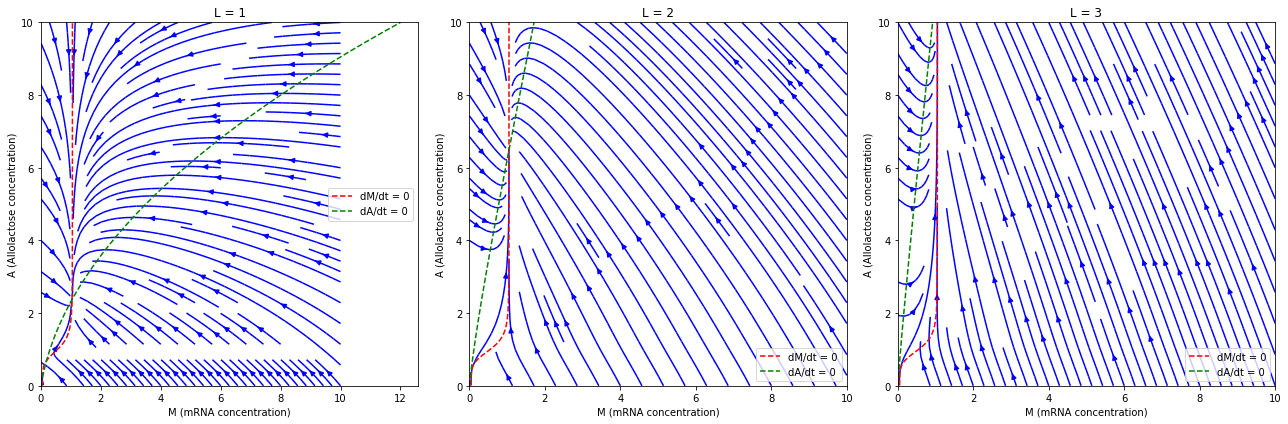

In [206]:

k1 = 0.05
k2 = k3 = Vmax = k4 = 1
k5 = 0.2
Km = 2
n = 5

# Define the range for M and A
M = np.linspace(0, 10, 60)

A = np.linspace(0, 10, 60)

M_grid, A_grid = np.meshgrid(M, A)

# Function definitions for dM/dt and dA/dt
def dM_dt(M, A):
    return k1 + k2 * (1 - 1/(1 + A**n)) - k3 * M

def dA_dt(M, A, L):
    return k4 * M * L - k5 * A - (Vmax * M * A) / (Km + A)

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
L_values = [1, 2, 3]

for i, L in enumerate(L_values):
    # Compute derivatives
    dM = dM_dt(M_grid, A_grid)
    dA = dA_dt(M_grid, A_grid, L)

    # Streamplot
    axes[i].streamplot(M_grid, A_grid, dM, dA, color='blue', density=1.2)
    
    # Nullclines
    # For dM/dt = 0
    A_nc1 = np.linspace(0.01, 10, 400)  # Avoid division by zero
    M_nc1 = k1 + k2 * (1 - 1 / (1 + A_nc1**n))
    axes[i].plot(M_nc1, A_nc1, 'r--', label='dM/dt = 0')
    
    # For dA/dt = 0, rearrange to M = (0.2 * A * (Km + A)) / (L * (Km + A) - A)
    A_nc2 = np.linspace(0.01, 10, 400)  # Avoid zero in denominator
    M_nc2 = (k5 * A_nc2 * (Km + A_nc2)) / (L * (Km + A_nc2) - A_nc2)
    valid_idx = np.where(L * (Km + A_nc2) - A_nc2 > 0)  # Physical condition
    axes[i].plot(M_nc2[valid_idx], A_nc2[valid_idx], 'g--', label='dA/dt = 0')
    
    axes[i].set_title(f'L = {L}')
    axes[i].set_xlabel('M (mRNA concentration)')
    axes[i].set_ylabel('A (Allolactose concentration)')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 3)

$$ 
\begin{bmatrix}
\frac{\partial}{\partial M} \left(k_1 + k_2 \left(1 - \frac{1}{1 + A^n}\right) - k_3 M\right) & \frac{\partial}{\partial A} \left(k_1 + k_2 \left(1 - \frac{1}{1 + A^n}\right) - k_3 M\right) \\
\frac{\partial}{\partial M} \left(k_4 M L - k_5 A - \frac{V_{\text{max}} M A}{K_m + A}\right)  & \frac{\partial}{\partial A} \left(k_4 M L - k_5 A - \frac{V_{\text{max}} M A}{K_m + A}\right)
\end{bmatrix} $$
The partial derivatives:
$$ \frac{\partial}{\partial M} \text{ of first eq.} = -k_3 $$
$$ \frac{\partial}{\partial A} \text{ of first eq.} = k_2 \frac{n A^{n-1}}{(1 + A^n)^2} $$
$$ \frac{\partial}{\partial M} \text{ of second eq.} = k_4 L - \frac{V_{\text{max}} A}{K_m + A} $$
$$ \frac{\partial}{\partial A} \text{ of second eq.} = -k_5 - \frac{V_{\text{max}} M K_m}{(K_m + A)^2} $$
We'll now compute the equilibrium points and evaluate the Jacobian for $L = 1$. We'll need to use numerical methods to solve it since analytical solutions might not be straightforward due to the nonlinearity of the equations.

In [201]:

# Re-define constants
k1, k2, k3, k4, k5, Vmax, Km, n = 0.05, 1, 1, 1, 0.2, 1, 2, 5

# Function definitions for calculating equilibrium points
def equations(vars, L):
    M, A = vars
    eq1 = k1 + k2 * (1 - 1/(1 + A**n)) - k3 * M
    eq2 = k4 * M * L - k5 * A - (Vmax * M * A) / (Km + A)
    return [eq1, eq2]


def jacobian_matrix(M, A, L):
            d_eq1_M = -k3  # from dM/dt with respect to M
            d_eq1_A = k2 * n * A**(n-1) / (1 + A**n)**2  # from dM/dt with respect to A
            d_eq2_M = k4 * L - Vmax * A / (Km + A)  # from dA/dt with respect to M
            d_eq2_A = -k5 - Vmax * M * Km / (Km + A)**2  # from dA/dt with respect to A
            return np.array([[d_eq1_M, d_eq1_A], [d_eq2_M, d_eq2_A]])

# Initial guesses for M and A
initial_guesses = [[0.1,0.1],[1,1],[2, 2]]
L_values = [1,2,3]
    # Find equilibrium points using fsolve
L_value=1
i=0
for initial_guess in initial_guesses:
        M_eq, A_eq = fsolve(equations, initial_guess, args=(L_value))

        # Direct calculation of partial derivatives to form the Jacobian matrix
        
        # Calculate the Jacobian matrix at the equilibrium point
        jacobian_evaluated = jacobian_matrix(M_eq, A_eq, L_value)

        # Compute eigenvalues of the Jacobian matrix
        eigenvalues_direct = np.linalg.eigvals(jacobian_evaluated)
        print(f"Equilibrium point {i+1} for L={L_value} --- M={np.round(M_eq,3)} and A={np.round(A_eq,3)} \nJacobian and eigen values: \n ")
        print(jacobian_evaluated,eigenvalues_direct  )
        i+=1

Equilibrium point 1 for L=1 --- M=0.051 and A=0.227 
Jacobian and eigen values: 
 
[[-1.          0.01330999]
 [ 0.89798321 -0.22040336]] [-1.01504101 -0.20536235]
Equilibrium point 2 for L=1 --- M=0.186 and A=0.691 
Jacobian and eigen values: 
 
[[-1.          0.84981015]
 [ 0.74329942 -0.25134012]] [-1.50418374  0.25284363]
Equilibrium point 3 for L=1 --- M=1.037 and A=2.372 
Jacobian and eigen values: 
 
[[-1.          0.02735844]
 [ 0.45748581 -0.30850284]] [-1.01764952 -0.29085332]


In [202]:
L_value = 2
i=0
for initial_guess in initial_guesses:
        M_eq, A_eq = fsolve(equations, initial_guess, args=(L_value))

        # Direct calculation of partial derivatives to form the Jacobian matrix
        
        # Calculate the Jacobian matrix at the equilibrium point
        jacobian_evaluated = jacobian_matrix(M_eq, A_eq, L_value)

        # Compute eigenvalues of the Jacobian matrix
        eigenvalues_direct = np.linalg.eigvals(jacobian_evaluated)
        print(f"Equilibrium point {i+1} for L={L_value} --- M={np.round(M_eq,3)} and A={np.round(A_eq,3)} \nJacobian and eigen values: \n ")
        print(jacobian_evaluated,eigenvalues_direct  )
        i+=1

Equilibrium point 1 for L=2 --- M=0.047 and A=0.393 
Jacobian and eigen values: 
 
[[-1.          0.11757135]
 [ 1.83561997 -0.21628056]] [-1.21589874e+00 -3.81816797e-04]
Equilibrium point 2 for L=2 --- M=0.047 and A=0.394 
Jacobian and eigen values: 
 
[[-1.          0.11781974]
 [ 1.83554575 -0.21628805]] [-1.21626788e+00 -2.01700333e-05]
Equilibrium point 3 for L=2 --- M=1.05 and A=6.487 
Jacobian and eigen values: 
 
[[-1.00000000e+00  6.71049054e-05]
 [ 1.23566305e+00 -2.29154546e-01]] [-1.00010755 -0.22904699]


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [203]:
L_value = 3
i=0
for initial_guess in initial_guesses:
        M_eq, A_eq = fsolve(equations, initial_guess, args=(L_value))

        # Direct calculation of partial derivatives to form the Jacobian matrix
        
        # Calculate the Jacobian matrix at the equilibrium point
        jacobian_evaluated = jacobian_matrix(M_eq, A_eq, L_value)

        # Compute eigenvalues of the Jacobian matrix
        eigenvalues_direct = np.linalg.eigvals(jacobian_evaluated)
        print(f"Equilibrium point {i+1} for L={L_value} --- M={np.round(M_eq,3)} and A={np.round(A_eq,3)} \nJacobian and eigen values: \n ")
        print(jacobian_evaluated,eigenvalues_direct  )
        i+=1

Equilibrium point 1 for L=3 --- M=0.028 and A=0.35 
Jacobian and eigen values: 
 
[[-1.          0.07402721]
 [ 2.85115997 -0.21009898]] [-1.21089544e+00  7.96459325e-04]
Equilibrium point 2 for L=3 --- M=0.028 and A=0.35 
Jacobian and eigen values: 
 
[[-1.          0.07425371]
 [ 2.8510619  -0.21010799]] [-1.21142375  0.00131576]
Equilibrium point 3 for L=3 --- M=1.05 and A=11.29 
Jacobian and eigen values: 
 
[[-1.00000000e+00  2.41434670e-06]
 [ 2.15048899e+00 -2.11889580e-01]] [-1.00000659 -0.21188299]


L=1

3 equlibrium points the first and second are stable node and the second one is a saddle equlibrium point

L=2

2 equlibrium (differences in M and A between the first one and second one are small and are likely due to numerical error of the solver) points the first one is a saddle equlibrium point and the second one is a stable node

L=3

2 equlibrium points (differences in M and A between the first one and second one are small and are likely due to numerical error of the solver) the first one is a saddle equlibrium point and the second one is a stable node


The types of equilibrium points were identified based on the eigenvalues of the Jaccobian matrix  stable point have both eigenvalues negative  and saddle nodes one  positive and  and  one negative. This stability analysis aligns with the biological functionality of the Lac operon, which dynamically adjusts gene expression in response to changes in lactose availability.

All of the identifed equilibrium points are a dynamic equilibriums since the rates of idnividual reaction are non zero for example in the equaition $k_1 + k_2 \left(1 - \frac{1}{1 + A^n}\right) - k_3 M$ non of the rate consttants or concetrations are zero therefore there is chemical activity, which results in equilibrium as only tthe sum of those terms is erqual to zero

# d)

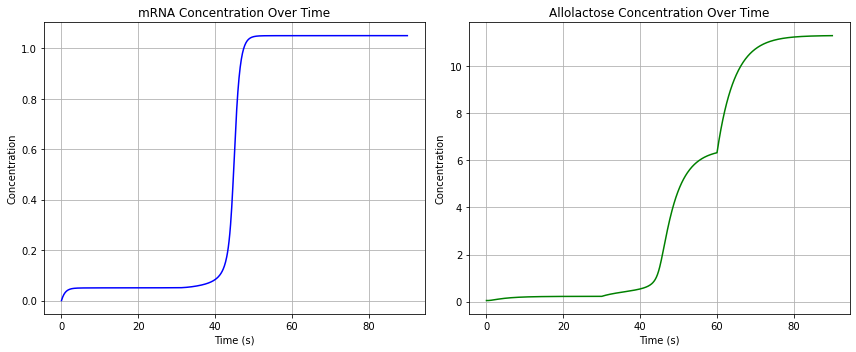

In [204]:
# Define the time step and total simulation time
dt = 0.1  # Time step
total_time = 90
num_steps = int(total_time / dt) + 1

# Initialize arrays to store the time and concentrations
time_steps = np.linspace(0, total_time, num_steps)
M = np.zeros(num_steps)
A = np.zeros(num_steps)
M[0], A[0] = 0, 0.05  # Initial conditions

# Function to determine L based on time
def get_L(t):
    if t < 30:
        return 1
    elif t < 60:
        return 2
    else:
        return 3

# Simulation using Euler's method
for i in range(1, num_steps):
    t = time_steps[i - 1]
    L = get_L(t)
    # Calculate derivatives
    dMdt = k1 + k2 * (1 - 1/(1 + A[i - 1]**n)) - k3 * M[i - 1]
    dAdt = k4 * M[i - 1] * L - k5 * A[i - 1] - (Vmax * M[i - 1] * A[i - 1]) / (Km + A[i - 1])
    # Update M and A using Euler's method
    M[i] = M[i - 1] + dMdt * dt
    A[i] = A[i - 1] + dAdt * dt

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time_steps, M, label='mRNA (M)', color='blue')
plt.title('mRNA Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_steps, A, label='Allolactose (A)', color='green')
plt.title('Allolactose Concentration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.grid(True)

plt.tight_layout()
plt.show()



The plot starts from zero and increases as the system initiates transcription. Each increase in lactose concentration (L) at t = 30 and t = 60 seconds causes noticeable jumps in mRNA levels. Like the flow lines in the streamplots, these time plots show the system’s response moving towards new equilibria or steady states in response to changes in external conditions (L changes). Based on the steamplots we would expect our system to go to new equlibrium as eqilibrium for L=1 is no longer an equilibrium for L=2, hence system goes to a new equilibrium along the lines sugested by the stemplots, which is evident by an increase in both A and M. Intrestingly after the L increase from 2 to 3 the mRNA concentration remained constant despite the invrease in Alloctose concentration, this is in agreement with our expectation based on stream plots and equilibrium investigation.

This systems shares some similarites to networks discussed in Q2 as the changess in the L concetration cause the  bifurcation of the equlibrium points. The relationnship betwen mRNA and L is similar to the mutual activation network as cellular response changes abruptly and irreversibly as the signal magnitude crosses a critical value. However the raltionship between the Alloctose is morre similar to the mutual inhibition netwrk as change in L first cause an increase in A concentration, which is than supressed due  to an increase in the Allolactose consumption rate.



# e) 
The simulation of mRNA and allolactose concentrations in the Lac operon reveals a dynamic molecular response to varying lactose levels. As lactose concentration increases, allolactose inhibits the repressor, allowing for enhanced transcription of the operon genes and increased production of β-galactosidase and permease. This results in a positive feedback loop, where more lactose is imported and converted to allolactose, further driving gene expression. This regulatory mechanism allows Escherichia coli to adapt efficiently to changes in environmental lactose availability, optimizing energy utilization and growth conditions. 